<img src="images/shit.jpg" align="center" style="height: 400px;"/>

# Занятие №2

## План на сегодня

1. Обучаемость и адаптивные алгоритмы, биологический и искусственный нейроны.
2. Линейность одного и нелинейность совокупности нейронов. Обучение перцептрона.
3. Реализация модели многослойного перцептрона.
4. Знакомство с Keras и PyTorch.

## 1. Понятие обучаемости

До недавнего времени обычные компьютерные программы базировались на теории алгоритмов, они не были способны улучшаться по мере решения задач. Это значит, что в одной и той ситуации такая программа будет давать один и тот же ответ, даже если он неправильный. 

Появляется логичное желание - создать программу, которая на основе новых данных будет обучаться, подобно человеку. Оказалось, что такое возможно. Так называемые адаптивные алгоритмы позволили достичь этой цели. Именно об этом подходе и пойдет речь в нашем курсе.  

> Говорят, что компьтерная программа обучается решению задачи T на основе опыта E, если качество решения по метрике P растет по мере накопления опыта E. (_Mitchell "Machine learning", 1997_)

## 2. Настоящий биологический нейрон

Нейрон (от др.-греч. νεῦρον — волокно, нерв) — узко специализированная клетка, структурно-функциональная единица нервной системы.

Настоящий билогический нейрон обладает одним важным свойством, которое делает его интересным для рассмотрения. Это нейропластичнойть (возможно, если мы научимся моделировать нейроны, то сможем реализовывать адаптивные алгоритмы). Примеры нейроплостичности - умение «видеть» спиной или языком (сенсорное замещение).

<img src="images/Sen.jpg" align="center" style="height: 400px;"/>

<img src="images/Neuron.png" align="center" style="height: 400px;"/>

<img src="images/Neur.jpg" align="center" style="height: 400px;"/>

В нейроне происходят довольно сложные процессы. Нейрон взаимодейтсвует со средой прежде всего:   
- с помощью калиево-натриевого «насоса»
- за счет диффузии и различия в проводимости мембраны
- за счет электростатических сил (так как в среде и в нейроне много ионов)

Уравнение Нернста (уравнение, связывающее окислительно-восстановительный потенциал системы с активностями веществ, входящих в электрохимическое уравнение, и стандартными электродными потенциалами окислительно-восстановительных пар):
$$ E=E^{0}+{\frac  {RT}{nF}}\ln {\frac  {a_{{{\rm {{Ox}}}}}}{a_{{{\rm {{Red}}}}}}}$$

$E$ — электродный потенциал, ${\displaystyle E^{0}}$ — стандартный электродный потенциал    
${\displaystyle R}$  — универсальная газовая постоянная   
${\displaystyle T}$  — абсолютная температура   
${\displaystyle F}$  — постоянная Фарадея   
${\displaystyle n}$  — число электронов, участвующих в процессе   
${\displaystyle a_{\rm {Ox}}}$ и ${\displaystyle a_{\rm {Red}}}$ — активности соответственно окисленной и восстановленной форм вещества, участвующего в полуреакции.

В обычном состоянии нейрон находится в динамическом равновесии со средой (потенциал покоя порядка -70 мВ), но при изменении потенциала могут открываться и другие каналы, что приводит к тому, что возникает лавинообразная реакция. А именно, после открытия каналов, система будет стримится к новому положению равновесия (изменились параметры в уравнении Нернста). Через некоторое время постепенно начинают закрываться каналы, что приводит к тому, что нейрон возвращается к своему исходному состоянию, а потенциал падает даже немного ниже -70 мВ (аналог инерции).

<img src="images/graph.jpg" align="center" style="height: 400px;"/>

Такие возмещения есть способ передачи импульса по аксону нейрона. Таким образом сигнал доходит до окончания аксона, в место его соединения со дендритами других нейронов (такие соединения называются синапсами).

<img src="images/go.jpg" align="center" style="height: 400px;"/>

Когда активация доходит до синапса, то в пространство между аксоном и следующим нейроном (так называемая синаптическая щель) выбрасываются нерйомедиаторы, которые могут провоцировать открытие или закрытие определенных каналов у нейрона, с которым соединен рассматриваемый нейрон. Происходит локальная деполяризация участка мембраны, что может запустить аналогичную реакцию в следующем нейроне. Множественные связи между нейронами, сложные соединения и наличие как активирующих, так и тормозных синопсов, обеспечивает неропластичность всего мозга.

## 3. Искусственный нейрон

Упрощенная схема нейрона выглядит так:

<img src="images/Neuron_Scheme.png" align="center" style="height: 400px;"/>

$$h(\vec{x}) = f(\vec{x} \cdot \vec{w})$$

Здесь $f(x)$ - функция активации.   
Их достаточно большое семейство, самая простая из них - пороговая:

<img src="images/Act1.png" align="center" style="height: 400px;"/>

$$f(x) = \begin{cases}
   1 & x > 0 \\
   0 & x \leq 0 \\
 \end{cases}
$$

Далее, пока что, под функцией активации будем понимать именно пороговую функцию.

### 3.1 Применение искуственного нейрона на примере булевой алгебры

**Логическое отрицание (НЕ):**  

|   $x$         | $\overline{x}$| 
| ------------- |---------------| 
|       1       |      0        | 
|      0        |      1        |

Реализуем эту функцию с помощью одного нейрона. Это значит, что надо подобрать два параметра - вес и смещение так, чтобы нейрон реализовывал эту унарную логическую функцию.

Можно угадать ответ, либо, подойти к задаче более формально и составить систему неравенств, ограничевающие наши параметры.

Подбор: $w_0 = 0.5$, $w_1 = -1$

Система:   
$$ 
\begin{cases}
   w_0 + x_1w_1 > 0 & x_1 = 0 \\
   w_0 + x_1w_1 \leq 0 & x_1 = 1 \\
 \end{cases}
$$

$$ 
\begin{cases}
   w_0 > 0 \\
   w_0 + w_1 \leq 0 \\
 \end{cases}
$$

Заметим, что решений (пар чисел $w_0, w_1$), удовлетворяющих нашей системе, бесконечно много.

<img src="images/ne.jpg" align="center" style="height: 400px;"/>

**Логическое умножение, конъюкция (И):**

|   $x_1$       |   $x_2$       | $x_1 \& x_2$   |
| ------------- |---------------| ---------------|
|     1         |    1          |     1          |
|     1         |    0          |     0          |
|     0         |    1          |     0          |
|     0         |    0          |     0          |

Попробуем так же реализовать эту уже бинарную булеву функцию, теперь нам надо подобрать три параметра - смещенение и два веса.

<img src="images/and.jpg" align="center" style="height: 400px;"/>

Чтобы не угадывать, сразу составим систему:

$$
\begin{cases}
   w_0 + x_1w_1 + x_2w_2 > 0 & x_1 = 1, x_2 = 1 \\
   w_0 + x_1w_1 + x_2w_2 \leq 0 & x_1 = 1, x_2 = 0 \\
   w_0 + x_1w_1 + x_2w_2 \leq 0 & x_1 = 0, x_2 = 1 \\
   w_0 + x_1w_1 + x_2w_2 \leq 0 & x_1 = 0, x_2 = 0 \\
 \end{cases}
$$

$$
\begin{cases}
   w_0 + w_1 + w_2 > 0 \\
   w_0 + w_1 \leq 0 \\
   w_0 + w_2 \leq 0 \\
   w_0  \leq 0 \\
 \end{cases}
$$

Одно из решений: $w_0 = -1.5$, $w_1 = 1$, $w_2 = 1$.
<img src="images/andg.jpg" align="center" style="height: 400px;"/>

**Логическое сложение, дизъюнкция (ИЛИ):**

|   $x_1$       |   $x_2$       |   $x_1$ + $x_2$    |
| ------------- |---------------| -----------------|
|     1         |    1          |       1          |
|     1         |    0          |       1          |
|     0         |    1          |       1          |
|     0         |    0          |       0          |

$$
\begin{cases}
   w_0 + x_1w_1 + x_2w_2 > 0 & x_1 = 1, x_2 = 1 \\
   w_0 + x_1w_1 + x_2w_2 > 0 & x_1 = 1, x_2 = 0 \\
   w_0 + x_1w_1 + x_2w_2 > 0 & x_1 = 0, x_2 = 1 \\
   w_0 + x_1w_1 + x_2w_2 \leq 0 & x_1 = 0, x_2 = 0 \\
 \end{cases}
$$

$$
\begin{cases}
   w_0 + w_1 + w_2 > 0 \\
   w_0 + w_1 > 0 \\
   w_0 + w_2 > 0 \\
   w_0  \leq 0 \\
 \end{cases}
$$

Одно из решений: $w_0 = -1$, $w_1 = 2$, $w_2 = 2$

**Исключающие или (XOR)**

|   $x_1$       |   $x_2$       |   $x_1$ $\oplus$ $x_2$  |
| ------------- |---------------| -----------------|
|     1         |    1          |       0          |
|     1         |    0          |       1          |
|     0         |    1          |       1          |
|     0         |    0          |       0          |

$$
\begin{cases}
   w_0 + x_1w_1 + x_2w_2 \leq 0 & x_1 = 1, x_2 = 1 \\
   w_0 + x_1w_1 + x_2w_2 > 0 & x_1 = 1, x_2 = 0 \\
   w_0 + x_1w_1 + x_2w_2 > 0 & x_1 = 0, x_2 = 1 \\
   w_0 + x_1w_1 + x_2w_2 \leq 0 & x_1 = 0, x_2 = 0 \\
 \end{cases}
$$

$$
\begin{cases}
   w_0 + w_1 + w_2 \leq 0 \\
   w_0 + w_1 > 0 \\
   w_0 + w_2 > 0 \\
   w_0  \leq 0 \\
 \end{cases}
$$

Получившаяся система несовместна, то есть нет ни одной тройки весов, которая бы удовлетворяла данной системе. Действительно, сложив первое с последним, а второе с третьем неравенства предыдущей системы, получим:

$$
\begin{cases}
   2w_0 + w_1 + w_2 \leq 0 \\
   2w_0 + w_1 + w_2 > 0 \\
 \end{cases}
$$

То есть одна и та же величина одновременно больше нуля и меньше либо равна нулю, чего быть не может. Это означает, что мы не существует нейрона с пороговой функцией активации, который бы реализовывал функцию $XOR$.

<img src="images/cat.jpg" align="center" style="height: 400px;"/>

Давайте проанализируем почему же какие-то булевы функции мы можем реализовать с помощью искусственного нейрона, а какие-то нет, и выясним, когда это моно сделать, а когда нет. 

Вернемся к бинарным булевым функциям «и» и «или». При составлении систем неравенств для нахождения весов в правой части всегда находилось выражение $w_0 + w_1x_1 + w_2x_2$, которе всегда сравнивалось с нулем.    
Рассмотрим выражение $w_0 + w_1x_1 + w_2x_2 = 0$ как функцию от $x_1$ и $x_2$. Очевидно, что это выражение задает прямую на координатной плоскости $x_1$ и $x_2$. Во всех примерах до XOR всегда можно было провести прямую так, чтобы отделить точки, где функция принимает значение 1 от тех точек, в которых ее занчение равно 0. А вот для исключающего или такой прямой просто не существует! Нельзя отделить точки одной прямой, но их можно разделить, используя несколько разделяющих поверхностей.

<img src="images/xor.jpg" align="center" style="height: 400px;"/>

Из булевой алгебры известно, что 	
$$
    \displaystyle x_1 \oplus x_2 =  {\overline {x}_1}\cdot x_2 + x_1 \cdot {\overline {x}_2}.
$$
Значит, мы можем реализовать функцию XOR как композицию пяти нейронов.

### 3.2 Реализация искуственного нейрона

In [1]:
class neuron():
    def __init__(self, w_0, w_1, w_2):
        self.w_0 = w_0
        self.w_1 = w_1
        self.w_2 = w_2
        
    def activation(self, x_1, x_2):
        return int(self.w_0 + x_1*self.w_1 + x_2*self.w_2 > 0)
    
    def show(self):
        print(self.activation(1, 1))
        print(self.activation(1, 0))
        print(self.activation(0, 1))
        print(self.activation(0, 0))

In [2]:
class NO(neuron):
    def __init__(self):
        super().__init__(0.5, -1, None)
        
    def activation(self, x_1):
        return int(self.w_0 + x_1*self.w_1 > 0)
    
    def show(self):
        print(self.activation(1))
        print(self.activation(0))
    
class AND(neuron):
    def __init__(self):
        super().__init__(-1.5, 1, 1)
        
class OR(neuron):
    def __init__(self):
        super().__init__(-1, 2, 2)
                
class XOR(neuron):
    def __init__(self):
        super().__init__(None, None, None)
        
    No = NO()
    And = AND()
    Or = OR()
            
    def activation(self, x_1, x_2):
        ans = Or.activation(And.activation(No.activation(x_1), x_2), And.activation(x_1, No.activation(x_2)))
        return ans

In [3]:
No = NO()
No.show()

print()

And = AND()
And.show()

print()

Or = OR()
Or.show()

print()

Xor = XOR()
Xor.show()

0
1

1
0
0
0

1
1
1
0

0
1
1
0


Ключевой момент - мы смогли разделить нелинейную выборку, использую комбинацию линейных нейронов. Значит, совокупность правильно соединенных нейронов могут решать сложные задачи. Осталось научить нейроны.

## 4. Обучение перцептрона

Обучение перцептрона состоит в том, чтобы подобрать все веса таким образом, чтобы обученный перцептрон (то есть перцептрон с такими весами) правильно решал все примеры.

Изначально веса инициализируются случайным образом, поэтому ответ перцептрона - случайное число. Показывая перцептрону примеры и правильные ответы, мы хотим, чтобы от случайных весов и ответов он перешел к правильным весам и осмысленным ответам.

<img src="images/teach.jpg" align="center" style="height: 400px;"/>

$$
    \Delta w_i = (y_i - \hat{y}_i) \cdot x_i 
$$

Более общее правило обучения (дельта-правило):
$$
    \Delta w_i = \eta \cdot (y_i - \hat{y}_i) \cdot x_i
$$

- $y$ — правильный ответ для текущего примера
- $\hat{y}$ — выходная активация перцептрона
- $x_i$ — $i$-й вход перцептрона на текущем примере
- $w_i$ — $i$-й вес перцептрона
- $\Delta w_i$ — изменение i-го веса после предъявления текущего примера
- $\eta > 0$ - небольшая константа, которая задает скорость обучения 

Существует доказательство сходимости этого алгоритма обучения персептрона с использованием дельта-правила за конечное число шагов (при линейно разделимой обучаемой выборке). Модель персептрона в настоящий момент представляет больше историческую ценность, чем практическую. Но именно на его примере удается более наглядно показать некоторые важные принципы функционирования, в том числе и обучения нейронных сетей.

### 4.1 Пример
Мы погуляли в фруктовом саду и собрали следующие данные про несколько обнаруженных там фруктов:
$$
\begin{array}{ c | c c c} & \text{желтизна} & \text{симметричность} & \text{это груша?} \\\hline 1 & 1 & 0.3 & \text{да} \\ 2 & 0.4 & 0.5 & \text{да} \\ 3 & 0.7 & 0.8 & \text{нет} \end{array}
$$
Пусть у нас есть перцептрон с весами (0, 0) и смещением 0. 
Давайте проведем одну итерацию обучения перцептрона на приведённых данных, чтобы научиться различать груши и не груши (шаг обучения равен 1).

Ответ: (0, 0.3, -0.5) - смещение, желтизна, симмеричность.

## 5. Многослойный перцептрон
<img src="images/per.png" align="center" style="height: 400px;"/>

Решим задачу регресии - научимся восстанавливать функцию одного аргумента с помощью полносвязной сети с одним скрытым слоем, в котором будет $n$ нейронов.

Теорма Цыбенко (универсальная теорема апроксимации) утверждает, что искусственная нейронная сеть прямой связи (в которых связи не образуют циклов) с одним скрытым слоем может аппроксимировать любую непрерывную на компакте функцию многих переменных с любой точностью. 

<img src="images/SinNet.png" align="center" style="height: 400px;"/>

Выход нейронной сети: 
$$y(x) = B \sigma(Ax + \alpha) + \beta$$

$ A = \begin{pmatrix}
a_1 & a_2 & \ldots & a_n
\end{pmatrix}^T $ - вектор весов нейронов скрытого слоя, 

$ \alpha = \begin{pmatrix}
\alpha_1 & \alpha_2 & \ldots & \alpha_n
\end{pmatrix}^T $ - вектор смещений нейронов скрытого слоя,

$ B = \begin{pmatrix}
b_1 & b_2 & \ldots & b_n
\end{pmatrix} $ - вектор весов нейрона выходного слоя,

$\beta$ - смещение нейрона выходного слоя.

### 5.1 Реализация полносвязной однослойной неронной сети

In [95]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib

import time
import tqdm

matplotlib.rcParams['figure.figsize'] = (13.0, 5.0) # размер графика по умолчанию (13.0, 5.0)
np.random.seed(42) # Для воспроизводимости результатов

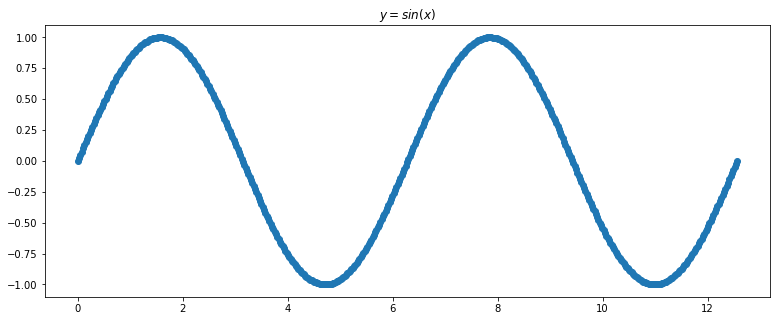

In [96]:
x_train = np.linspace(0, 4*np.pi, num = 500)
y_train = np.sin(x_train)

# plt.figure(figsize = (10,7)) # размер графика (10,7)
plt.plot(x_train, y_train, 'o')
plt.title('$y = sin(x)$');

Text(0.5, 1.0, 'Gaussian noise')

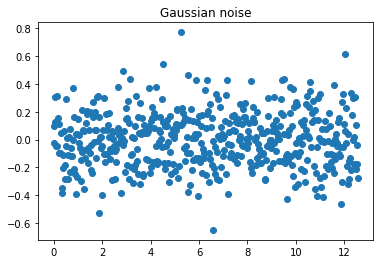

In [8]:
# Добавим гауссовский шум
noise = np.random.normal(size = 500) / 5 # 100 чисел из нормального распределения с матожиданием 0 и стандартным отклонением 1 

plt.plot(x_train, noise, 'o')
plt.title('Gaussian noise')

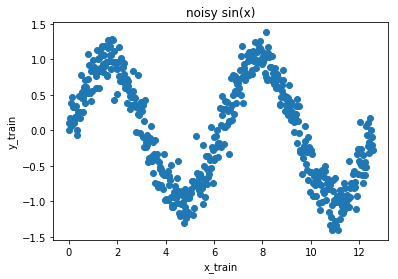

In [9]:
y_train = y_train + noise

plt.plot(x_train, y_train, 'o')
plt.title('noisy sin(x)')
plt.xlabel('x_train')
plt.ylabel('y_train');

In [10]:
# Полезные функции

def sigma(x):
    '''Sigmoid function'''
    return 1.0 / (1 + np.exp(-x))

def der_sigm(x):
    '''Derevative of sigmoid function'''
    return sigma(x)*(1 - sigma(x))

def loss(y, y_hat):
    '''MSE function'''
    return ((np.array(y) - np.array(y_hat))**2).mean()

def target(y, y_hat):
    '''MAE function'''
    return (abs(np.array(y) - np.array(y_hat))).mean()

In [11]:
# Livehack

help(loss)

Help on function loss in module __main__:

loss(y, y_hat)
    MSE function



Производные функции потерь во матрицам весов:

$$\frac{\partial L}{\partial A} = \frac{2}{N} \sum_{i = 1}^N (B \sigma(Ax_i + \alpha) + \beta - \hat{y}_i) \cdot \sigma(Ax_i + \alpha) \odot (1 - \sigma(Ax_i + \alpha))x_i,$$

$$\frac{\partial L}{\partial \alpha} = \frac{2}{N} \sum_{i = 1}^N (B \sigma(Ax_i + \alpha) + \beta - \hat{y}_i) \cdot \sigma(Ax_i + \alpha) \odot (1 - \sigma(Ax_i + \alpha)),$$

$$\frac{\partial L}{\partial B} = \frac{2}{N} \sum_{i = 1}^N (B \sigma(Ax_i + \alpha) + \beta - \hat{y}_i) \cdot \sigma(Ax_i + \alpha)^T,$$

$$\frac{\partial L}{\partial \beta} = \frac{2}{N} \sum_{i = 1}^N (B \sigma(Ax_i + \alpha) + \beta - \hat{y}_i).$$

In [12]:
# Послнослойная нейронная сеть с одним входом и одним выходом (для решения задачи регрессии с одним предиктором)

class SinNet:
    def __init__(self, num_hidden_neurons):
        self.num_hidden_neurons = num_hidden_neurons
        
        self.A = np.random.normal(size = num_hidden_neurons).reshape(num_hidden_neurons, 1)
        self.alpha = np.random.normal(size = num_hidden_neurons).reshape(num_hidden_neurons, 1)
        self.B = np.random.normal(size = num_hidden_neurons).reshape(1, num_hidden_neurons)
        self.beta = np.random.normal(size = 1)
        
    def predict(self, x):
        return np.dot(self.B, sigma(np.dot(self.A, x) + self.alpha)) + self.beta
    
    def SGD_step(self, x, y, lr = 0.0025):
        self.A -= 2*lr*(self.predict(x) - y)*der_sigm(np.dot(self.A, x) + self.alpha)*x
        self.alpha -= 2*lr*(self.predict(x) - y)*der_sigm(np.dot(self.A, x) + self.alpha)
        self.B -= 2*lr*(self.predict(x) - y) * (sigma(np.dot(self.A, x) + self.alpha)).T
        self.beta -= 2*lr*(self.predict(x) - y)[0] # без [0] возвращает ([[число]])

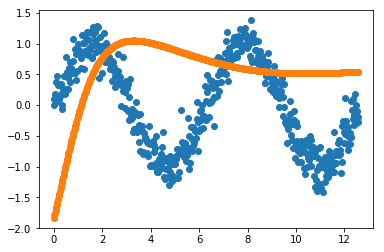

In [13]:
net = SinNet(100)

Y = []
for x in x_train:
    Y.append(*net.predict(x))

plt.plot(x_train, y_train, 'o', label = 'training')
plt.plot(x_train, Y, 'o', label = 'predicted')

In [14]:
# Обучение сети стахостическим градиентным спуском

x_train1 = np.linspace(0, 4*np.pi, num = 500)
y_train1 = np.sin(x_train1)

time_start = time.time()

for epoch in tqdm.tqdm_notebook(range(500), desc = 'Progress bar'):
    for i in tqdm.tqdm_notebook(range(len(x_train)), desc = str(epoch+1) + ' epoch'):
        j = np.random.randint(0, len(x_train))
        net.SGD_step(x_train[j], y_train[j])
            
print((time.time() - time_start) / 60, "minutes")


1.0593427618344624 minutes


MSE: 0.8806414275760996
MAE: 0.7672289699447175


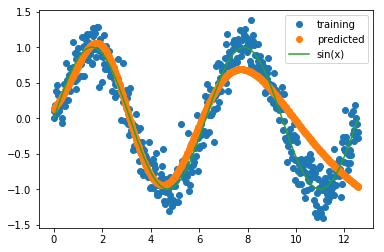

In [17]:
Y = []
for x in x_train:
    Y.append(*net.predict(x))

plt.plot(x_train, y_train, 'o', label = 'training')
plt.plot(x_train, Y, 'o', label = 'predicted')

plt.plot(x_train1, y_train1, label = 'sin(x)')
plt.legend()

print("MSE:", loss(Y, y_train1))
print("MAE:", target(Y, y_train1))

### 5.2 Знакомство с Keras

In [2]:
from keras.models import Sequential
from keras.layers import Dense

from keras import models
from keras import layers

Using TensorFlow backend.


In [19]:
help(Sequential)

Help on class Sequential in module keras.engine.sequential:

class Sequential(keras.engine.training.Model)
 |  Sequential(layers=None, name=None)
 |  
 |  Linear stack of layers.
 |  
 |  # Arguments
 |      layers: list of layers to add to the model.
 |  
 |  # Example
 |  
 |  ```python
 |  # Optionally, the first layer can receive an `input_shape` argument:
 |  model = Sequential()
 |  model.add(Dense(32, input_shape=(500,)))
 |  
 |  # Afterwards, we do automatic shape inference:
 |  model.add(Dense(32))
 |  
 |  # This is identical to the following:
 |  model = Sequential()
 |  model.add(Dense(32, input_dim=500))
 |  
 |  # And to the following:
 |  model = Sequential()
 |  model.add(Dense(32, batch_input_shape=(None, 500)))
 |  
 |  # Note that you can also omit the `input_shape` argument:
 |  # In that case the model gets built the first time you call `fit` (or other
 |  # training and evaluation methods).
 |  model = Sequential()
 |  model.add(Dense(32))
 |  model.add(Dense(32)

In [3]:
# Создадим модель с помощью класса Sequential (только для линейного стека слоев)

model_1 = Sequential()
model_1.add(Dense(50, activation = "sigmoid", input_shape = [1]))
model_1.add(Dense(1)) # activation = "linear"

model_1.compile(optimizer = "SGD", loss = "mse", metrics = ["mae"])

Instructions for updating:
Colocations handled automatically by placer.


In [90]:
# А вот та же модель но с применением функционального API (позволяет конструировать произвольные архитектуры сетей, 
#                                                                                           не только полносвязные)

input_tensor = layers.Input(shape = (1,))
x = layers.Dense(50, activation = "sigmoid")(input_tensor)
output_tensor = layers.Dense(1, activation = "linear")(x)
model_2 = models.Model(inputs = input_tensor, outputs = output_tensor)

model_2.compile(optimizer = "SGD", loss = "mse", metrics = ["mae"], lr = 0.0025)

In [91]:
# почему shape = (1,) в input_tensor

x = np.array([1])
print(x.shape)

(1,)


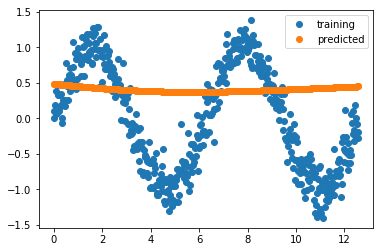

In [92]:
# Вдруг здесь работает без обучения?

plt.plot(x_train, y_train, 'o', label = 'training')
plt.plot(x_train, model_1.predict(x_train), "o", label = 'predicted')
plt.legend()

In [93]:
time_start = time.time()
model_1.fit(x_train, y_train, epochs = 500, batch_size = 1)

print((time.time() - time_start) / 60, " minutes")

Epoch 1/500
500/500 [==============================] - ETA: 1:21 - loss: 1.4728 - mean_absolute_error: 1.213 - ETA: 1s - loss: 0.6045 - mean_absolute_error: 0.6543  - ETA: 0s - loss: 0.6798 - mean_absolute_error: 0.701 - ETA: 0s - loss: 0.6752 - mean_absolute_error: 0.705 - ETA: 0s - loss: 0.6479 - mean_absolute_error: 0.687 - ETA: 0s - loss: 0.6348 - mean_absolute_error: 0.679 - ETA: 0s - loss: 0.6094 - mean_absolute_error: 0.658 - ETA: 0s - loss: 0.6013 - mean_absolute_error: 0.653 - ETA: 0s - loss: 0.5890 - mean_absolute_error: 0.644 - 1s 1ms/step - loss: 0.5874 - mean_absolute_error: 0.6408
Epoch 2/500
500/500 [==============================] - ETA: 0s - loss: 0.0063 - mean_absolute_error: 0.079 - ETA: 0s - loss: 0.5174 - mean_absolute_error: 0.603 - ETA: 0s - loss: 0.5079 - mean_absolute_error: 0.583 - ETA: 0s - loss: 0.5140 - mean_absolute_error: 0.595 - ETA: 0s - loss: 0.4694 - mean_absolute_error: 0.562 - ETA: 0s - loss: 0.4800 - mean_absolute_error: 0.574 - ETA: 0s - loss: 0.4

500/500 [==============================] - ETA: 0s - loss: 0.0178 - mean_absolute_error: 0.133 - ETA: 0s - loss: 0.5628 - mean_absolute_error: 0.654 - ETA: 0s - loss: 0.4917 - mean_absolute_error: 0.601 - ETA: 0s - loss: 0.4477 - mean_absolute_error: 0.562 - ETA: 0s - loss: 0.4790 - mean_absolute_error: 0.592 - ETA: 0s - loss: 0.4677 - mean_absolute_error: 0.584 - ETA: 0s - loss: 0.4658 - mean_absolute_error: 0.581 - ETA: 0s - loss: 0.4903 - mean_absolute_error: 0.598 - ETA: 0s - loss: 0.4869 - mean_absolute_error: 0.595 - 0s 877us/step - loss: 0.4911 - mean_absolute_error: 0.5994
Epoch 25/500
500/500 [==============================] - ETA: 0s - loss: 0.2843 - mean_absolute_error: 0.533 - ETA: 0s - loss: 0.5025 - mean_absolute_error: 0.584 - ETA: 0s - loss: 0.5593 - mean_absolute_error: 0.643 - ETA: 0s - loss: 0.4980 - mean_absolute_error: 0.599 - ETA: 0s - loss: 0.4775 - mean_absolute_error: 0.582 - ETA: 0s - loss: 0.4791 - mean_absolute_error: 0.586 - ETA: 0s - loss: 0.4797 - mean_ab

500/500 [==============================] - ETA: 0s - loss: 0.0602 - mean_absolute_error: 0.245 - ETA: 0s - loss: 0.4159 - mean_absolute_error: 0.536 - ETA: 0s - loss: 0.4769 - mean_absolute_error: 0.597 - ETA: 0s - loss: 0.4718 - mean_absolute_error: 0.591 - ETA: 0s - loss: 0.4653 - mean_absolute_error: 0.592 - ETA: 0s - loss: 0.4497 - mean_absolute_error: 0.581 - ETA: 0s - loss: 0.4549 - mean_absolute_error: 0.580 - ETA: 0s - loss: 0.4613 - mean_absolute_error: 0.583 - ETA: 0s - loss: 0.4695 - mean_absolute_error: 0.587 - ETA: 0s - loss: 0.4661 - mean_absolute_error: 0.586 - ETA: 0s - loss: 0.4676 - mean_absolute_error: 0.588 - 1s 1ms/step - loss: 0.4631 - mean_absolute_error: 0.5853
Epoch 47/500
500/500 [==============================] - ETA: 0s - loss: 0.3844 - mean_absolute_error: 0.620 - ETA: 0s - loss: 0.4151 - mean_absolute_error: 0.539 - ETA: 0s - loss: 0.4101 - mean_absolute_error: 0.547 - ETA: 0s - loss: 0.4373 - mean_absolute_error: 0.564 - ETA: 0s - loss: 0.4397 - mean_abso

500/500 [==============================] - ETA: 0s - loss: 0.0670 - mean_absolute_error: 0.258 - ETA: 0s - loss: 0.3623 - mean_absolute_error: 0.505 - ETA: 0s - loss: 0.4753 - mean_absolute_error: 0.583 - ETA: 0s - loss: 0.4609 - mean_absolute_error: 0.575 - ETA: 0s - loss: 0.4429 - mean_absolute_error: 0.566 - ETA: 0s - loss: 0.4482 - mean_absolute_error: 0.573 - ETA: 0s - loss: 0.4712 - mean_absolute_error: 0.590 - ETA: 0s - loss: 0.4732 - mean_absolute_error: 0.592 - ETA: 0s - loss: 0.4641 - mean_absolute_error: 0.585 - ETA: 0s - loss: 0.4672 - mean_absolute_error: 0.586 - ETA: 0s - loss: 0.4731 - mean_absolute_error: 0.591 - 1s 1ms/step - loss: 0.4672 - mean_absolute_error: 0.5868
Epoch 70/500
500/500 [==============================] - ETA: 0s - loss: 0.2461 - mean_absolute_error: 0.496 - ETA: 0s - loss: 0.4889 - mean_absolute_error: 0.615 - ETA: 0s - loss: 0.5043 - mean_absolute_error: 0.622 - ETA: 0s - loss: 0.4429 - mean_absolute_error: 0.571 - ETA: 0s - loss: 0.4362 - mean_abso

500/500 [==============================] - ETA: 0s - loss: 0.1954 - mean_absolute_error: 0.442 - ETA: 0s - loss: 0.4647 - mean_absolute_error: 0.570 - ETA: 0s - loss: 0.4154 - mean_absolute_error: 0.541 - ETA: 0s - loss: 0.4416 - mean_absolute_error: 0.563 - ETA: 0s - loss: 0.4521 - mean_absolute_error: 0.575 - ETA: 0s - loss: 0.4531 - mean_absolute_error: 0.571 - ETA: 0s - loss: 0.4511 - mean_absolute_error: 0.571 - ETA: 0s - loss: 0.4425 - mean_absolute_error: 0.567 - ETA: 0s - loss: 0.4321 - mean_absolute_error: 0.560 - ETA: 0s - loss: 0.4307 - mean_absolute_error: 0.558 - 0s 951us/step - loss: 0.4349 - mean_absolute_error: 0.5613
Epoch 94/500
500/500 [==============================] - ETA: 0s - loss: 0.9737 - mean_absolute_error: 0.986 - ETA: 0s - loss: 0.3931 - mean_absolute_error: 0.530 - ETA: 0s - loss: 0.4084 - mean_absolute_error: 0.552 - ETA: 0s - loss: 0.4370 - mean_absolute_error: 0.561 - ETA: 0s - loss: 0.4257 - mean_absolute_error: 0.551 - ETA: 0s - loss: 0.4199 - mean_ab

Epoch 117/500
500/500 [==============================] - ETA: 0s - loss: 0.0623 - mean_absolute_error: 0.249 - ETA: 0s - loss: 0.3659 - mean_absolute_error: 0.507 - ETA: 0s - loss: 0.3764 - mean_absolute_error: 0.508 - ETA: 0s - loss: 0.3649 - mean_absolute_error: 0.498 - ETA: 0s - loss: 0.3540 - mean_absolute_error: 0.493 - ETA: 0s - loss: 0.3656 - mean_absolute_error: 0.498 - ETA: 0s - loss: 0.3646 - mean_absolute_error: 0.497 - ETA: 0s - loss: 0.3624 - mean_absolute_error: 0.498 - ETA: 0s - loss: 0.3619 - mean_absolute_error: 0.496 - ETA: 0s - loss: 0.3553 - mean_absolute_error: 0.488 - ETA: 0s - loss: 0.3455 - mean_absolute_error: 0.480 - 1s 1ms/step - loss: 0.3459 - mean_absolute_error: 0.4812
Epoch 118/500
500/500 [==============================] - ETA: 0s - loss: 0.0084 - mean_absolute_error: 0.091 - ETA: 0s - loss: 0.3002 - mean_absolute_error: 0.429 - ETA: 0s - loss: 0.3151 - mean_absolute_error: 0.443 - ETA: 0s - loss: 0.3133 - mean_absolute_error: 0.449 - ETA: 0s - loss: 0.3

500/500 [==============================] - ETA: 0s - loss: 0.0151 - mean_absolute_error: 0.122 - ETA: 0s - loss: 0.3168 - mean_absolute_error: 0.448 - ETA: 0s - loss: 0.3022 - mean_absolute_error: 0.427 - ETA: 0s - loss: 0.2770 - mean_absolute_error: 0.412 - ETA: 0s - loss: 0.2876 - mean_absolute_error: 0.419 - ETA: 0s - loss: 0.2786 - mean_absolute_error: 0.409 - ETA: 0s - loss: 0.2977 - mean_absolute_error: 0.427 - ETA: 0s - loss: 0.2836 - mean_absolute_error: 0.417 - ETA: 0s - loss: 0.2906 - mean_absolute_error: 0.423 - ETA: 0s - loss: 0.2888 - mean_absolute_error: 0.422 - 0s 978us/step - loss: 0.2916 - mean_absolute_error: 0.4244
Epoch 142/500
500/500 [==============================] - ETA: 1s - loss: 0.0177 - mean_absolute_error: 0.133 - ETA: 0s - loss: 0.3361 - mean_absolute_error: 0.464 - ETA: 0s - loss: 0.3510 - mean_absolute_error: 0.467 - ETA: 0s - loss: 0.3466 - mean_absolute_error: 0.465 - ETA: 0s - loss: 0.3357 - mean_absolute_error: 0.461 - ETA: 0s - loss: 0.3312 - mean_a

Epoch 166/500
500/500 [==============================] - ETA: 0s - loss: 0.0010 - mean_absolute_error: 0.032 - ETA: 0s - loss: 0.2227 - mean_absolute_error: 0.368 - ETA: 0s - loss: 0.2498 - mean_absolute_error: 0.395 - ETA: 0s - loss: 0.2613 - mean_absolute_error: 0.407 - ETA: 0s - loss: 0.2584 - mean_absolute_error: 0.405 - ETA: 0s - loss: 0.2739 - mean_absolute_error: 0.416 - ETA: 0s - loss: 0.2538 - mean_absolute_error: 0.399 - ETA: 0s - loss: 0.2585 - mean_absolute_error: 0.401 - ETA: 0s - loss: 0.2525 - mean_absolute_error: 0.397 - ETA: 0s - loss: 0.2550 - mean_absolute_error: 0.400 - 0s 972us/step - loss: 0.2586 - mean_absolute_error: 0.4055
Epoch 167/500
500/500 [==============================] - ETA: 1s - loss: 0.0320 - mean_absolute_error: 0.178 - ETA: 0s - loss: 0.1869 - mean_absolute_error: 0.354 - ETA: 0s - loss: 0.2536 - mean_absolute_error: 0.407 - ETA: 0s - loss: 0.2441 - mean_absolute_error: 0.390 - ETA: 0s - loss: 0.2690 - mean_absolute_error: 0.413 - ETA: 0s - loss: 0

500/500 [==============================] - ETA: 0s - loss: 0.1209 - mean_absolute_error: 0.347 - ETA: 0s - loss: 0.2185 - mean_absolute_error: 0.387 - ETA: 0s - loss: 0.2190 - mean_absolute_error: 0.390 - ETA: 0s - loss: 0.2043 - mean_absolute_error: 0.369 - ETA: 0s - loss: 0.2095 - mean_absolute_error: 0.362 - ETA: 0s - loss: 0.2171 - mean_absolute_error: 0.369 - ETA: 0s - loss: 0.2225 - mean_absolute_error: 0.375 - ETA: 0s - loss: 0.2268 - mean_absolute_error: 0.377 - ETA: 0s - loss: 0.2231 - mean_absolute_error: 0.374 - 0s 898us/step - loss: 0.2236 - mean_absolute_error: 0.3742
Epoch 191/500
500/500 [==============================] - ETA: 0s - loss: 0.2942 - mean_absolute_error: 0.542 - ETA: 0s - loss: 0.2796 - mean_absolute_error: 0.437 - ETA: 0s - loss: 0.2287 - mean_absolute_error: 0.389 - ETA: 0s - loss: 0.2155 - mean_absolute_error: 0.374 - ETA: 0s - loss: 0.2093 - mean_absolute_error: 0.364 - ETA: 0s - loss: 0.2245 - mean_absolute_error: 0.376 - ETA: 0s - loss: 0.2274 - mean_a

500/500 [==============================] - ETA: 0s - loss: 0.0473 - mean_absolute_error: 0.217 - ETA: 0s - loss: 0.1983 - mean_absolute_error: 0.361 - ETA: 0s - loss: 0.1981 - mean_absolute_error: 0.360 - ETA: 0s - loss: 0.2075 - mean_absolute_error: 0.372 - ETA: 0s - loss: 0.2152 - mean_absolute_error: 0.376 - ETA: 0s - loss: 0.2078 - mean_absolute_error: 0.368 - ETA: 0s - loss: 0.2019 - mean_absolute_error: 0.361 - ETA: 0s - loss: 0.2024 - mean_absolute_error: 0.360 - ETA: 0s - loss: 0.2006 - mean_absolute_error: 0.359 - ETA: 0s - loss: 0.1965 - mean_absolute_error: 0.355 - ETA: 0s - loss: 0.1987 - mean_absolute_error: 0.357 - ETA: 0s - loss: 0.1954 - mean_absolute_error: 0.354 - 1s 1ms/step - loss: 0.1937 - mean_absolute_error: 0.3535
Epoch 214/500
500/500 [==============================] - ETA: 0s - loss: 0.0453 - mean_absolute_error: 0.213 - ETA: 0s - loss: 0.1465 - mean_absolute_error: 0.295 - ETA: 0s - loss: 0.1795 - mean_absolute_error: 0.338 - ETA: 0s - loss: 0.1989 - mean_abs

500/500 [==============================] - ETA: 1s - loss: 0.3814 - mean_absolute_error: 0.617 - ETA: 0s - loss: 0.1419 - mean_absolute_error: 0.300 - ETA: 0s - loss: 0.1567 - mean_absolute_error: 0.314 - ETA: 0s - loss: 0.1672 - mean_absolute_error: 0.326 - ETA: 0s - loss: 0.1730 - mean_absolute_error: 0.328 - ETA: 0s - loss: 0.1679 - mean_absolute_error: 0.325 - ETA: 0s - loss: 0.1624 - mean_absolute_error: 0.320 - ETA: 0s - loss: 0.1626 - mean_absolute_error: 0.322 - ETA: 0s - loss: 0.1719 - mean_absolute_error: 0.331 - 0s 855us/step - loss: 0.1701 - mean_absolute_error: 0.3304
Epoch 236/500
500/500 [==============================] - ETA: 0s - loss: 0.0952 - mean_absolute_error: 0.308 - ETA: 0s - loss: 0.2036 - mean_absolute_error: 0.339 - ETA: 0s - loss: 0.1752 - mean_absolute_error: 0.320 - ETA: 0s - loss: 0.1833 - mean_absolute_error: 0.333 - ETA: 0s - loss: 0.1815 - mean_absolute_error: 0.333 - ETA: 0s - loss: 0.1871 - mean_absolute_error: 0.342 - ETA: 0s - loss: 0.1829 - mean_a

500/500 [==============================] - ETA: 1s - loss: 0.0131 - mean_absolute_error: 0.114 - ETA: 1s - loss: 0.1548 - mean_absolute_error: 0.316 - ETA: 1s - loss: 0.1296 - mean_absolute_error: 0.292 - ETA: 1s - loss: 0.1384 - mean_absolute_error: 0.309 - ETA: 1s - loss: 0.1411 - mean_absolute_error: 0.306 - ETA: 1s - loss: 0.1425 - mean_absolute_error: 0.308 - ETA: 1s - loss: 0.1536 - mean_absolute_error: 0.318 - ETA: 1s - loss: 0.1545 - mean_absolute_error: 0.316 - ETA: 0s - loss: 0.1509 - mean_absolute_error: 0.313 - ETA: 0s - loss: 0.1574 - mean_absolute_error: 0.321 - ETA: 0s - loss: 0.1556 - mean_absolute_error: 0.315 - ETA: 0s - loss: 0.1556 - mean_absolute_error: 0.314 - ETA: 0s - loss: 0.1537 - mean_absolute_error: 0.312 - ETA: 0s - loss: 0.1497 - mean_absolute_error: 0.309 - ETA: 0s - loss: 0.1558 - mean_absolute_error: 0.312 - ETA: 0s - loss: 0.1553 - mean_absolute_error: 0.312 - ETA: 0s - loss: 0.1561 - mean_absolute_error: 0.312 - ETA: 0s - loss: 0.1550 - mean_absolute_

Epoch 270/500
500/500 [==============================] - ETA: 0s - loss: 0.0232 - mean_absolute_error: 0.152 - ETA: 0s - loss: 0.1317 - mean_absolute_error: 0.286 - ETA: 0s - loss: 0.1488 - mean_absolute_error: 0.312 - ETA: 0s - loss: 0.1548 - mean_absolute_error: 0.310 - ETA: 0s - loss: 0.1551 - mean_absolute_error: 0.309 - ETA: 0s - loss: 0.1479 - mean_absolute_error: 0.300 - ETA: 0s - loss: 0.1516 - mean_absolute_error: 0.305 - ETA: 0s - loss: 0.1478 - mean_absolute_error: 0.303 - 0s 759us/step - loss: 0.1452 - mean_absolute_error: 0.3005
Epoch 271/500
500/500 [==============================] - ETA: 1s - loss: 0.0020 - mean_absolute_error: 0.044 - ETA: 0s - loss: 0.1077 - mean_absolute_error: 0.262 - ETA: 0s - loss: 0.1366 - mean_absolute_error: 0.298 - ETA: 0s - loss: 0.1258 - mean_absolute_error: 0.284 - ETA: 0s - loss: 0.1219 - mean_absolute_error: 0.282 - ETA: 0s - loss: 0.1296 - mean_absolute_error: 0.287 - ETA: 0s - loss: 0.1461 - mean_absolute_error: 0.302 - ETA: 0s - loss: 0

500/500 [==============================] - ETA: 0s - loss: 2.2649e-04 - mean_absolute_error: 0.015 - ETA: 0s - loss: 0.1261 - mean_absolute_error: 0.2760    - ETA: 0s - loss: 0.1257 - mean_absolute_error: 0.275 - ETA: 0s - loss: 0.1423 - mean_absolute_error: 0.295 - ETA: 0s - loss: 0.1449 - mean_absolute_error: 0.299 - ETA: 0s - loss: 0.1443 - mean_absolute_error: 0.300 - 0s 596us/step - loss: 0.1369 - mean_absolute_error: 0.2926
Epoch 303/500
500/500 [==============================] - ETA: 1s - loss: 0.0047 - mean_absolute_error: 0.068 - ETA: 0s - loss: 0.1503 - mean_absolute_error: 0.310 - ETA: 0s - loss: 0.1261 - mean_absolute_error: 0.288 - ETA: 0s - loss: 0.1307 - mean_absolute_error: 0.288 - ETA: 0s - loss: 0.1226 - mean_absolute_error: 0.277 - ETA: 0s - loss: 0.1257 - mean_absolute_error: 0.281 - 0s 606us/step - loss: 0.1298 - mean_absolute_error: 0.2856
Epoch 304/500
500/500 [==============================] - ETA: 0s - loss: 0.0384 - mean_absolute_error: 0.196 - ETA: 0s - loss:

500/500 [==============================] - ETA: 0s - loss: 0.2499 - mean_absolute_error: 0.499 - ETA: 0s - loss: 0.1515 - mean_absolute_error: 0.306 - ETA: 0s - loss: 0.1318 - mean_absolute_error: 0.289 - ETA: 0s - loss: 0.1299 - mean_absolute_error: 0.280 - ETA: 0s - loss: 0.1288 - mean_absolute_error: 0.279 - ETA: 0s - loss: 0.1325 - mean_absolute_error: 0.282 - ETA: 0s - loss: 0.1261 - mean_absolute_error: 0.277 - ETA: 0s - loss: 0.1292 - mean_absolute_error: 0.279 - ETA: 0s - loss: 0.1307 - mean_absolute_error: 0.279 - 0s 841us/step - loss: 0.1298 - mean_absolute_error: 0.2793
Epoch 328/500
500/500 [==============================] - ETA: 0s - loss: 0.0018 - mean_absolute_error: 0.043 - ETA: 0s - loss: 0.1490 - mean_absolute_error: 0.304 - ETA: 0s - loss: 0.1415 - mean_absolute_error: 0.295 - ETA: 0s - loss: 0.1476 - mean_absolute_error: 0.304 - ETA: 0s - loss: 0.1392 - mean_absolute_error: 0.291 - ETA: 0s - loss: 0.1421 - mean_absolute_error: 0.294 - ETA: 0s - loss: 0.1418 - mean_a

500/500 [==============================] - ETA: 0s - loss: 0.0654 - mean_absolute_error: 0.255 - ETA: 0s - loss: 0.1462 - mean_absolute_error: 0.293 - ETA: 0s - loss: 0.1495 - mean_absolute_error: 0.308 - ETA: 0s - loss: 0.1444 - mean_absolute_error: 0.302 - ETA: 0s - loss: 0.1348 - mean_absolute_error: 0.291 - ETA: 0s - loss: 0.1293 - mean_absolute_error: 0.283 - ETA: 0s - loss: 0.1324 - mean_absolute_error: 0.283 - ETA: 0s - loss: 0.1335 - mean_absolute_error: 0.287 - ETA: 0s - loss: 0.1287 - mean_absolute_error: 0.282 - 0s 860us/step - loss: 0.1269 - mean_absolute_error: 0.2807
Epoch 352/500
500/500 [==============================] - ETA: 0s - loss: 0.0927 - mean_absolute_error: 0.304 - ETA: 0s - loss: 0.0957 - mean_absolute_error: 0.246 - ETA: 0s - loss: 0.1194 - mean_absolute_error: 0.278 - ETA: 0s - loss: 0.1346 - mean_absolute_error: 0.297 - ETA: 0s - loss: 0.1384 - mean_absolute_error: 0.298 - ETA: 0s - loss: 0.1294 - mean_absolute_error: 0.286 - ETA: 0s - loss: 0.1365 - mean_a

500/500 [==============================] - ETA: 1s - loss: 0.2594 - mean_absolute_error: 0.509 - ETA: 0s - loss: 0.1603 - mean_absolute_error: 0.305 - ETA: 0s - loss: 0.1559 - mean_absolute_error: 0.312 - ETA: 0s - loss: 0.1288 - mean_absolute_error: 0.281 - ETA: 0s - loss: 0.1281 - mean_absolute_error: 0.283 - ETA: 0s - loss: 0.1260 - mean_absolute_error: 0.280 - ETA: 0s - loss: 0.1253 - mean_absolute_error: 0.278 - ETA: 0s - loss: 0.1211 - mean_absolute_error: 0.275 - ETA: 0s - loss: 0.1243 - mean_absolute_error: 0.278 - 0s 875us/step - loss: 0.1215 - mean_absolute_error: 0.2747
Epoch 376/500
500/500 [==============================] - ETA: 2s - loss: 0.0225 - mean_absolute_error: 0.150 - ETA: 0s - loss: 0.1247 - mean_absolute_error: 0.269 - ETA: 0s - loss: 0.1279 - mean_absolute_error: 0.277 - ETA: 0s - loss: 0.1212 - mean_absolute_error: 0.277 - ETA: 0s - loss: 0.1262 - mean_absolute_error: 0.285 - ETA: 0s - loss: 0.1199 - mean_absolute_error: 0.278 - ETA: 0s - loss: 0.1189 - mean_a

Epoch 387/500
500/500 [==============================] - ETA: 0s - loss: 0.0072 - mean_absolute_error: 0.084 - ETA: 0s - loss: 0.1587 - mean_absolute_error: 0.316 - ETA: 0s - loss: 0.1309 - mean_absolute_error: 0.277 - ETA: 0s - loss: 0.1223 - mean_absolute_error: 0.269 - ETA: 0s - loss: 0.1182 - mean_absolute_error: 0.264 - ETA: 0s - loss: 0.1235 - mean_absolute_error: 0.272 - ETA: 0s - loss: 0.1218 - mean_absolute_error: 0.271 - ETA: 0s - loss: 0.1239 - mean_absolute_error: 0.275 - ETA: 0s - loss: 0.1231 - mean_absolute_error: 0.275 - ETA: 0s - loss: 0.1191 - mean_absolute_error: 0.270 - 0s 989us/step - loss: 0.1200 - mean_absolute_error: 0.2716
Epoch 388/500
500/500 [==============================] - ETA: 1s - loss: 0.0196 - mean_absolute_error: 0.139 - ETA: 0s - loss: 0.0720 - mean_absolute_error: 0.201 - ETA: 0s - loss: 0.1010 - mean_absolute_error: 0.237 - ETA: 0s - loss: 0.1172 - mean_absolute_error: 0.255 - ETA: 0s - loss: 0.1061 - mean_absolute_error: 0.245 - ETA: 0s - loss: 0

500/500 [==============================] - ETA: 2s - loss: 0.0495 - mean_absolute_error: 0.222 - ETA: 0s - loss: 0.1338 - mean_absolute_error: 0.273 - ETA: 0s - loss: 0.1249 - mean_absolute_error: 0.280 - ETA: 0s - loss: 0.1250 - mean_absolute_error: 0.281 - ETA: 0s - loss: 0.1164 - mean_absolute_error: 0.271 - ETA: 0s - loss: 0.1133 - mean_absolute_error: 0.266 - ETA: 0s - loss: 0.1095 - mean_absolute_error: 0.262 - ETA: 0s - loss: 0.1133 - mean_absolute_error: 0.266 - ETA: 0s - loss: 0.1122 - mean_absolute_error: 0.264 - 0s 902us/step - loss: 0.1191 - mean_absolute_error: 0.2728
Epoch 411/500
500/500 [==============================] - ETA: 1s - loss: 0.0903 - mean_absolute_error: 0.300 - ETA: 0s - loss: 0.1297 - mean_absolute_error: 0.288 - ETA: 0s - loss: 0.1239 - mean_absolute_error: 0.284 - ETA: 0s - loss: 0.1256 - mean_absolute_error: 0.278 - ETA: 0s - loss: 0.1331 - mean_absolute_error: 0.287 - ETA: 0s - loss: 0.1256 - mean_absolute_error: 0.280 - ETA: 0s - loss: 0.1279 - mean_a

500/500 [==============================] - ETA: 0s - loss: 1.9286e-04 - mean_absolute_error: 0.013 - ETA: 0s - loss: 0.1094 - mean_absolute_error: 0.2567    - ETA: 0s - loss: 0.1284 - mean_absolute_error: 0.278 - ETA: 0s - loss: 0.1129 - mean_absolute_error: 0.261 - ETA: 0s - loss: 0.0992 - mean_absolute_error: 0.241 - ETA: 0s - loss: 0.1044 - mean_absolute_error: 0.251 - ETA: 0s - loss: 0.1138 - mean_absolute_error: 0.260 - ETA: 0s - loss: 0.1183 - mean_absolute_error: 0.265 - ETA: 0s - loss: 0.1190 - mean_absolute_error: 0.267 - 0s 891us/step - loss: 0.1175 - mean_absolute_error: 0.2671
Epoch 435/500
500/500 [==============================] - ETA: 0s - loss: 0.1007 - mean_absolute_error: 0.317 - ETA: 0s - loss: 0.1435 - mean_absolute_error: 0.295 - ETA: 0s - loss: 0.1258 - mean_absolute_error: 0.278 - ETA: 0s - loss: 0.1323 - mean_absolute_error: 0.290 - ETA: 0s - loss: 0.1345 - mean_absolute_error: 0.290 - ETA: 0s - loss: 0.1320 - mean_absolute_error: 0.288 - ETA: 0s - loss: 0.1244 

Epoch 447/500
500/500 [==============================] - ETA: 0s - loss: 0.4302 - mean_absolute_error: 0.655 - ETA: 0s - loss: 0.1121 - mean_absolute_error: 0.255 - ETA: 0s - loss: 0.1119 - mean_absolute_error: 0.263 - ETA: 0s - loss: 0.1214 - mean_absolute_error: 0.271 - ETA: 0s - loss: 0.1273 - mean_absolute_error: 0.274 - ETA: 0s - loss: 0.1222 - mean_absolute_error: 0.268 - ETA: 0s - loss: 0.1217 - mean_absolute_error: 0.269 - ETA: 0s - loss: 0.1197 - mean_absolute_error: 0.267 - ETA: 0s - loss: 0.1203 - mean_absolute_error: 0.267 - ETA: 0s - loss: 0.1163 - mean_absolute_error: 0.262 - 0s 940us/step - loss: 0.1161 - mean_absolute_error: 0.2628
Epoch 448/500
500/500 [==============================] - ETA: 2s - loss: 0.0538 - mean_absolute_error: 0.231 - ETA: 0s - loss: 0.1375 - mean_absolute_error: 0.288 - ETA: 0s - loss: 0.1309 - mean_absolute_error: 0.287 - ETA: 0s - loss: 0.1280 - mean_absolute_error: 0.284 - ETA: 0s - loss: 0.1252 - mean_absolute_error: 0.279 - ETA: 0s - loss: 0

500/500 [==============================] - ETA: 1s - loss: 0.0034 - mean_absolute_error: 0.058 - ETA: 0s - loss: 0.1196 - mean_absolute_error: 0.262 - ETA: 0s - loss: 0.1128 - mean_absolute_error: 0.260 - ETA: 0s - loss: 0.1125 - mean_absolute_error: 0.266 - ETA: 0s - loss: 0.1091 - mean_absolute_error: 0.261 - ETA: 0s - loss: 0.1129 - mean_absolute_error: 0.269 - ETA: 0s - loss: 0.1238 - mean_absolute_error: 0.278 - ETA: 0s - loss: 0.1188 - mean_absolute_error: 0.272 - ETA: 0s - loss: 0.1211 - mean_absolute_error: 0.274 - ETA: 0s - loss: 0.1196 - mean_absolute_error: 0.272 - 0s 945us/step - loss: 0.1196 - mean_absolute_error: 0.2730
Epoch 472/500
500/500 [==============================] - ETA: 0s - loss: 0.0168 - mean_absolute_error: 0.129 - ETA: 0s - loss: 0.1876 - mean_absolute_error: 0.327 - ETA: 0s - loss: 0.1280 - mean_absolute_error: 0.267 - ETA: 0s - loss: 0.1241 - mean_absolute_error: 0.265 - ETA: 0s - loss: 0.1322 - mean_absolute_error: 0.275 - ETA: 0s - loss: 0.1223 - mean_a

500/500 [==============================] - ETA: 2s - loss: 0.7431 - mean_absolute_error: 0.862 - ETA: 0s - loss: 0.1325 - mean_absolute_error: 0.283 - ETA: 0s - loss: 0.1353 - mean_absolute_error: 0.290 - ETA: 0s - loss: 0.1294 - mean_absolute_error: 0.282 - ETA: 0s - loss: 0.1206 - mean_absolute_error: 0.272 - ETA: 0s - loss: 0.1237 - mean_absolute_error: 0.281 - ETA: 0s - loss: 0.1226 - mean_absolute_error: 0.277 - ETA: 0s - loss: 0.1219 - mean_absolute_error: 0.277 - ETA: 0s - loss: 0.1210 - mean_absolute_error: 0.275 - ETA: 0s - loss: 0.1151 - mean_absolute_error: 0.265 - ETA: 0s - loss: 0.1156 - mean_absolute_error: 0.267 - ETA: 0s - loss: 0.1147 - mean_absolute_error: 0.266 - 1s 1ms/step - loss: 0.1144 - mean_absolute_error: 0.2654
Epoch 497/500
500/500 [==============================] - ETA: 1s - loss: 3.1489e-05 - mean_absolute_error: 0.005 - ETA: 0s - loss: 0.0998 - mean_absolute_error: 0.2420    - ETA: 0s - loss: 0.1122 - mean_absolute_error: 0.256 - ETA: 0s - loss: 0.1090 - 

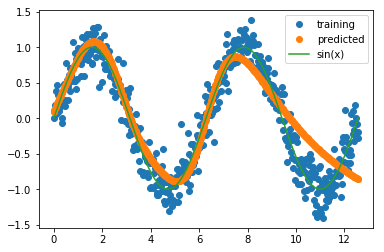

In [94]:
plt.plot(x_train, y_train, 'o', label = 'training')
plt.plot(x_train, model_1.predict(x_train), "o", label = 'predicted')

x_train1 = np.linspace(0, 4*np.pi, num = 500)
y_train1 = np.sin(x_train1)

plt.plot(x_train1, y_train1, label = 'sin(x)')
plt.legend()

### 5.3 Знакомство с PyTorch

In [70]:
import torch

class SineNet(torch.nn.Module):
    def __init__(self, n_hidden_neurons):
        super(SineNet, self).__init__()
        self.fc1 = torch.nn.Linear(1, n_hidden_neurons)
        self.act1 = torch.nn.Sigmoid()
        self.fc2 = torch.nn.Linear(n_hidden_neurons, 1)

    def forward(self, x):
        x = self.fc1(x)
        x = self.act1(x)
        x = self.fc2(x)
        return x

sine_net = SineNet(50)

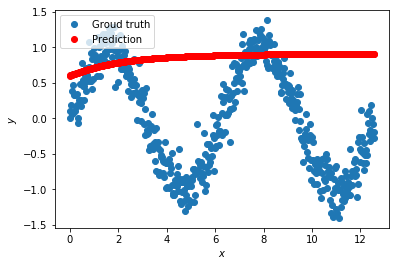

In [71]:
def predict(net, x, y):
    y_pred = net.forward(x)

    plt.plot(x.numpy(), y.numpy(), 'o', label='Groud truth')
    plt.plot(x.numpy(), y_pred.data.numpy(), 'o', c='r', label='Prediction');
    plt.legend(loc='upper left')
    plt.xlabel('$x$')
    plt.ylabel('$y$')
    
x_train_torch = torch.Tensor(x_train)
y_train_torch = torch.Tensor(y_train)

x_train_torch.unsqueeze_(1)
y_train_torch.unsqueeze_(1)

predict(sine_net, x_train_torch, y_train_torch)

In [72]:
tmp = torch.Tensor([1,2,3])
print(tmp)
print(tmp.unsqueeze(1))

tensor([1., 2., 3.])
tensor([[1.],
        [2.],
        [3.]])


In [73]:
def loss(pred, target):
    squares = (pred - target) ** 2
    return squares.mean()

In [74]:
optimizer = torch.optim.SGD(sine_net.parameters(), lr = 0.0025)

In [75]:
%%time

for epoch_index in range(500):
    optimizer.zero_grad()

    y_pred = sine_net.forward(x_train_torch)
    loss_val = loss(y_pred, y_train_torch)

    loss_val.backward()

    optimizer.step()

Wall time: 685 ms


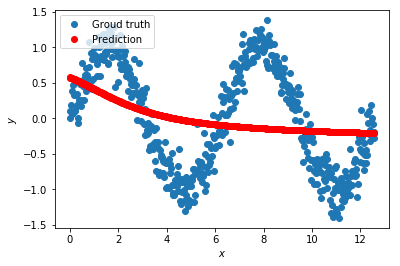

In [76]:
predict(sine_net, x_train_torch, y_train_torch)

In [85]:
sine_net = SineNet(50)

In [86]:
optimizer = torch.optim.Adam(sine_net.parameters(), lr = 0.0025)

In [87]:
%%time

for epoch_index in range(5000):
    optimizer.zero_grad()

    y_pred = sine_net.forward(x_train_torch)
    loss_val = loss(y_pred, y_train_torch)

    loss_val.backward()

    optimizer.step()

Wall time: 8.43 s


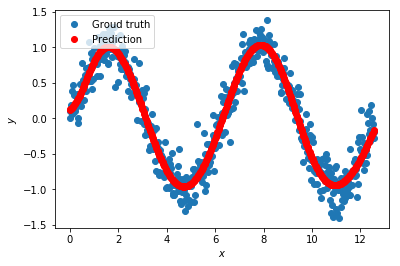

In [88]:
predict(sine_net, x_train_torch, y_train_torch)